In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#build the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Reshape the data to add a channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
#Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.8898 - loss: 0.3449
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9846 - loss: 0.0504
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9901 - loss: 0.0332
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9921 - loss: 0.0253
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9943 - loss: 0.0185


In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9846 - loss: 0.0491
Test accuracy: 0.9883000254631042


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


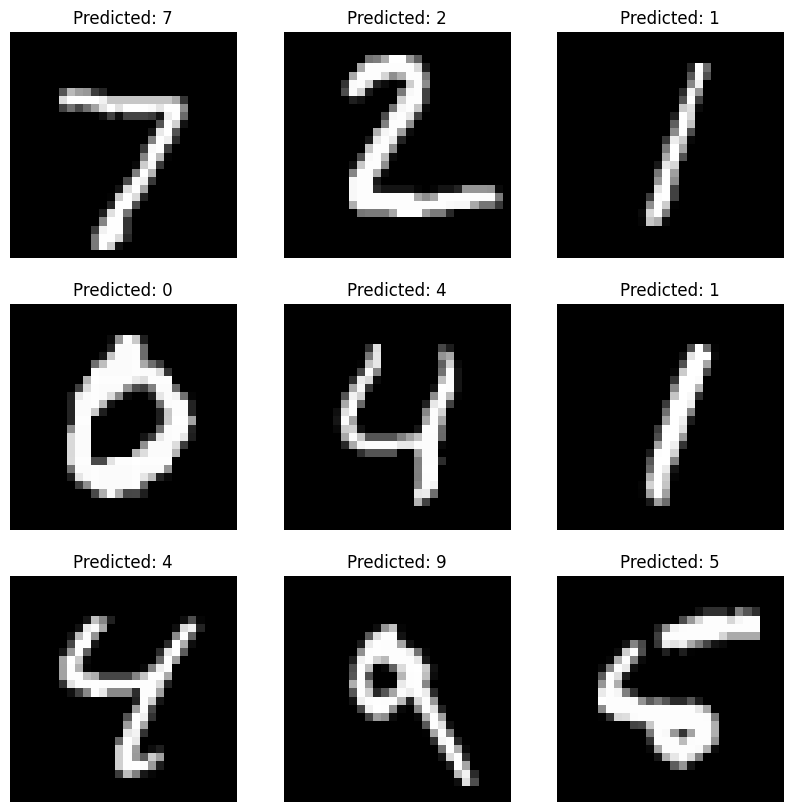

In [ ]:
#Make prediction
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()

In [ ]:
#save the model
model.save('mnist_model.h5')